In [167]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("student_performance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,attendance
0,female,group B,bachelor's degree,standard,none,72,72,74,93
1,female,group C,some college,standard,completed,69,90,88,96
2,female,group B,master's degree,standard,none,90,95,93,95
3,male,group A,associate's degree,free/reduced,none,47,57,44,79
4,male,group C,some college,standard,none,76,78,75,90


In [168]:
df.shape
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   attendance                   1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'attendance'],
      dtype='object')

In [169]:
df.isnull().sum()
df = df.dropna()   # or fillna()


In [170]:
df.duplicated().sum()
df = df.drop_duplicates()


In [171]:
df['attendance'] = df['attendance'].astype(int)


In [172]:
df.groupby("gender")["math score"].mean()


gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

In [173]:
df.groupby("gender")["writing score"].mean()


gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64

In [174]:
df.groupby("gender")["reading score"].mean()


gender
female    72.608108
male      65.473029
Name: reading score, dtype: float64

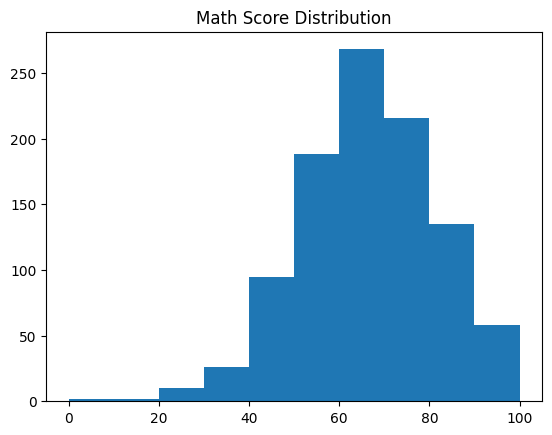

In [175]:
plt.hist(df['math score'], bins=10)
plt.title("Math Score Distribution")
plt.show()


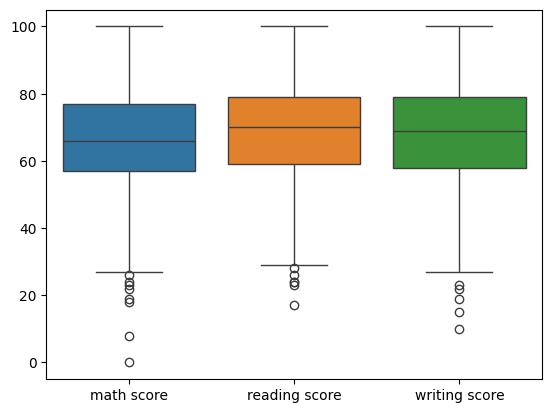

In [176]:
import seaborn as sns
sns.boxplot(data=df[['math score','reading score','writing score']])
plt.show()


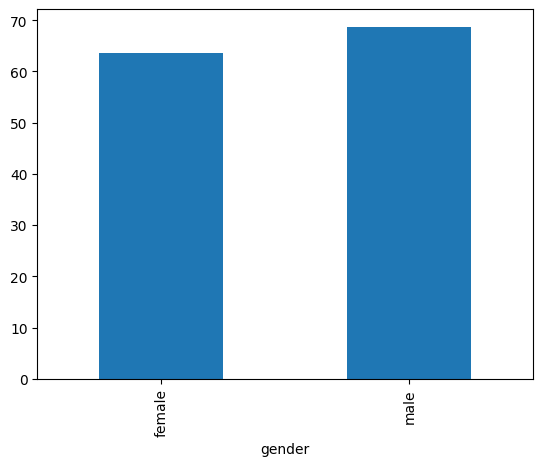

In [177]:
df.groupby('gender')['math score'].mean().plot(kind='bar')
plt.show()


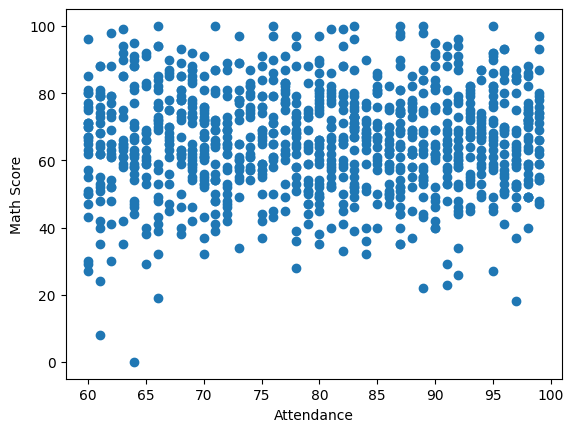

In [178]:
plt.scatter(df['attendance'], df['math score'])
plt.xlabel("Attendance")
plt.ylabel("Math Score")
plt.show()


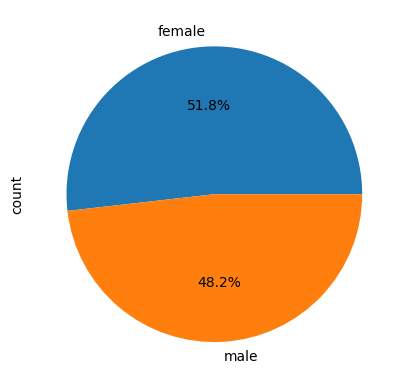

In [179]:
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()


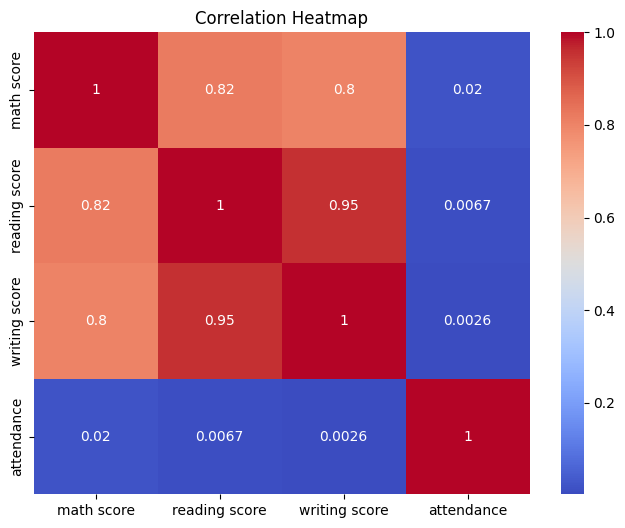

In [180]:
numeric_df = df.select_dtypes(include='number')
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
